# Digits Dataset Classification with apenet's Neural Network

This notebook demonstrates how to build, train, and evaluate a neural network model using the apenet library, using the Digits Dataset as an example.

## Import Libraries

In [ ]:
import numpy as np
## Data processing
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
## Data visualization
import matplotlib.pyplot as plt

# Import our library
from apenet.nn.models.mlp import MLP
from apenet.utils.data import train_test_split
from apenet.nn.loss.losses import CrossEntropyLoss
from apenet.nn.optimizers.optimizers import SGD
from apenet.eye.visuals import plot_history


## Set Random Generator

In [22]:
seed = 42
rng = np.random.default_rng(seed=seed)

# Data Overview

## Load and Preprocess Data


In [23]:
# Load and preprocess data
dataset = load_digits()
X = dataset.data
y = dataset.target

## Data Visualization

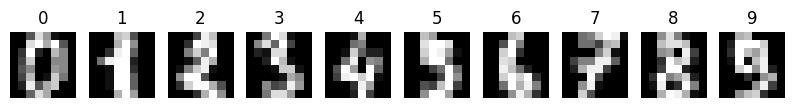

In [24]:
# Visualize some examples from the dataset
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(dataset.images[i], cmap='gray')
    ax.set_title(dataset.target[i])
    ax.axis('off')
plt.show()

## Data Preprocessing


In [25]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, rng=rng)

# Print the sizes of the training and test datasets
print(f"Training dataset size: {X_train.shape}")
print(f"Test dataset size: {X_test.shape}")

Training dataset size: (1438, 64)
Test dataset size: (359, 64)


# Model Overview

## Create Model


In [26]:
model = MLP(
    input_size=X_train.shape[1],
    hidden_sizes=[64, 32],
    output_size=10,
    hidden_activation='tanh',
    output_activation=None,
    initializer='Xavier',
    rng=rng
)

## Define Loss Function and Optimizer


In [27]:
loss_fn = CrossEntropyLoss()
optimizer = SGD(model.get_parameters(), learning_rate=0.01)

## Train Model


In [28]:
# Train model
history = model.fit(
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=50,
    batch_size=16,
    verbose=10,
    X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test
)

Epoch 1/50: train_loss=2.2255, train_acc=0.1759, val_loss=1.8581, val_acc=0.4485
Epoch 10/50: train_loss=0.4707, train_acc=0.9291, val_loss=0.4669, val_acc=0.9248
Epoch 20/50: train_loss=0.2506, train_acc=0.9604, val_loss=0.2688, val_acc=0.9554
Epoch 30/50: train_loss=0.1704, train_acc=0.9750, val_loss=0.1972, val_acc=0.9638
Epoch 40/50: train_loss=0.1280, train_acc=0.9833, val_loss=0.1608, val_acc=0.9666
Epoch 50/50: train_loss=0.1015, train_acc=0.9896, val_loss=0.1390, val_acc=0.9666


## Evaluate Model


In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test, loss_fn=loss_fn)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.1390, Test Accuracy: 0.9666


## Plot Training History


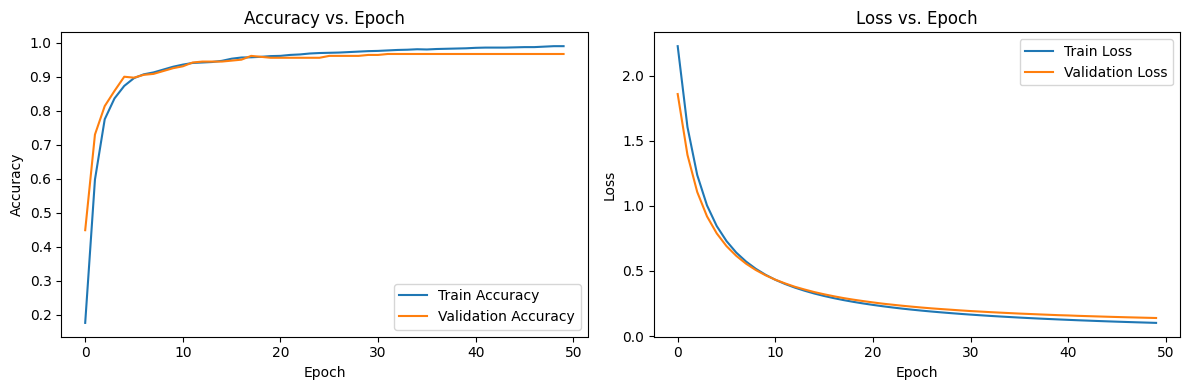

In [30]:
plot_history(history)